In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import time

In [2]:
class CustomSpectralClustering:
    
    def __init__(self, g):
        
        self.A = np.array(nx.linalg.graphmatrix.adjacency_matrix(g).todense())
        
        self.D = np.zeros(self.A.shape)
        np.fill_diagonal(self.D, self.A.sum(axis = 1))
        
        self.L = self.D - self.A
        
    def fit_predict(self, n_clusters):
        
        vals, vecs = np.linalg.eig(self.L)
        idx = np.argsort(vals)
        vecs = vecs[:,idx]
        vals = vals[idx]
        
        self.X = vecs[:,1:n_clusters]
        
        self.clustering = KMeans(n_clusters = n_clusters, random_state=0).fit_predict(self.X)
        
        return self.clustering
    
    def plot(self):
        
        plt.scatter(self.X[:, 0], self.X[:, 1], s = 100, c = self.clustering)
        plt.show()

**Custom Example**

In [3]:
n = 5
m = 20
sizes = [m]*n
p_within = 0.75
p_between = 0.05
p = np.ones((n, n))*p_between
np.fill_diagonal(p, p_within)

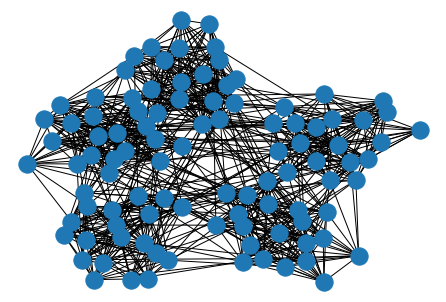

In [4]:
g = nx.generators.community.stochastic_block_model(sizes, p = p, seed = 0)
nx.draw(g)

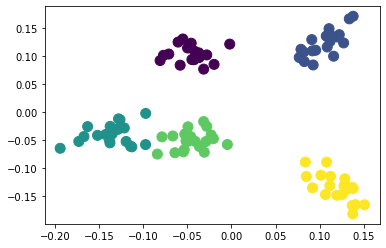

In [5]:
csc = CustomSpectralClustering(g)
csc.fit_predict(n)
csc.plot()

In [6]:
clusters = csc.clustering
print(set(clusters))

for i in range(n):
    
    print(len(set(clusters[(i*m):(i*m+m)])) == 1)

{0, 1, 2, 3, 4}
True
True
True
True
True


# Challenge

The function below works the same as CustomSpectralClustering class and is used in the challenge.

In [7]:
def SpectralClustering(A, n_clusters):
    
    D = np.zeros(A.shape)
    np.fill_diagonal(D, A.sum(axis = 1))
    
    L = D - A
    
    vals, vecs = np.linalg.eig(L)
    vecs = vecs[:,np.argsort(vals)]
        
    X = np.real(vecs[:,1:n_clusters])
        
    return KMeans(n_clusters = n_clusters, random_state=0).fit_predict(X)

**Dataset 1 (K = 2)**

In [8]:
data1 = pd.read_csv('data\D1-K=2.csv', header = None).to_numpy()

In [9]:
start = time.time()
s1 = SpectralClustering(data1, 2)
end = time.time()
time1 = end - start

In [10]:
clusters1 = pd.DataFrame(s1+1, index = range(1,len(s1)+1))
clusters1.to_csv('D1-K=2.csv', header = None)

**Dataset 2 (K = 7)**

In [11]:
data2 = pd.read_csv('data\D2-K=7.csv', header = None).to_numpy()

In [12]:
start = time.time()
s2 = SpectralClustering(data2, 7)
end = time.time()
time2 = end - start

In [13]:
clusters2 = pd.DataFrame(s2+1, index = range(1,len(s2)+1))
clusters2.to_csv('D2-K=7.csv', header = None)

**Dataset 3 (K = 12)**

In [14]:
data3 = pd.read_csv('data\D3-K=12.csv', header = None).to_numpy()

In [15]:
start = time.time()
s3 = SpectralClustering(data3, 12)
end = time.time()
time3 = end - start

In [16]:
clusters3 = pd.DataFrame(s3+1, index = range(1,len(s3)+1))
clusters3.to_csv('D3-K=12.csv', header = None)

**Description file**

In [17]:
names = 'Mateusz Szysz Mateusz Marzec'
repo = 'https://github.com/matszsz/Social-networks'
time1_str = '{D1-K=2.csv, ' + str(time1) + '}' 
time2_str = '{D2-K=7.csv, ' + str(time2) + '}' 
time3_str = '{D3-K=12.csv, ' + str(time3) + '}' 
times = time1_str + ',' + time2_str + ',' + time3_str

In [18]:
with open("description.txt", "w") as file:
    file.write(names)
    file.write('\n')
    file.write(repo)
    file.write('\n')
    file.write(times)